# Plot footprints for TF pair locations

## Calculate TF positions from motifs

We calculate the location of TFBS by scanning the genome for motif positions, and run market basket analysis to find co-occurring TFs:

In [1]:
import tfcomb
C = tfcomb.CombObj()
C.TFBS_from_motifs(regions="../data/GM12878_hg38_chr4_ATAC_peaks.bed", 
                   motifs="../data/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="../data/hg38_chr4_masked.fa.gz", 
                   motif_pvalue=5e-05,
                   threads=4)

INFO: Scanning for TFBS with 4 thread(s)...
INFO: Progress: 10%
INFO: Progress: 20%
INFO: Progress: 30%
INFO: Progress: 40%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 70%
INFO: Progress: 80%
INFO: Progress: 90%
INFO: Finished!
INFO: Processing scanned TFBS
INFO: Identified 335816 TFBS (401 unique names) within given regions


In [2]:
C.count_within(threads=4)
C.market_basket()
C.simplify_rules()

INFO: Setting up binding sites for counting
INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Progress: 10%
INFO: Progress: 20%
INFO: Progress: 30%
INFO: Progress: 40%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 70%
INFO: Progress: 82%
INFO: Progress: 90%
INFO: Finished!
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs
INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [3]:
C.rules.head(10)

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP1-SP2,SP1,SP2,2875,2778,3282,0.952144,104.820996
SP2-SP3,SP2,SP3,2810,3282,2828,0.922353,92.952277
SP1-SP3,SP1,SP3,2278,2778,2828,0.812733,80.089043
PATZ1-SP2,PATZ1,SP2,2426,3155,3282,0.753914,83.580134
KLF3-SP2,KLF3,SP2,1990,2140,3282,0.750891,85.818027
SP2-THAP1,SP2,THAP1,1624,3282,1431,0.749371,81.414141
SP2-WT1,SP2,WT1,2368,3282,3113,0.740837,57.145810
KLF6-SP2,KLF6,SP2,2102,2540,3282,0.728025,63.578733
KLF3-SP3,KLF3,SP3,1749,2140,2828,0.710957,79.665583
SP2-SP4,SP2,SP4,1991,3282,2411,0.707788,79.178087


## Obtain locations of pairs 

In [4]:
pairs = C.get_pair_locations("PATZ1","SP2")

In [5]:
len(pairs)

2426

## Plot pair footprints

In [6]:
pairs._bigwig_path = "../data/GM12878_corrected.bw"

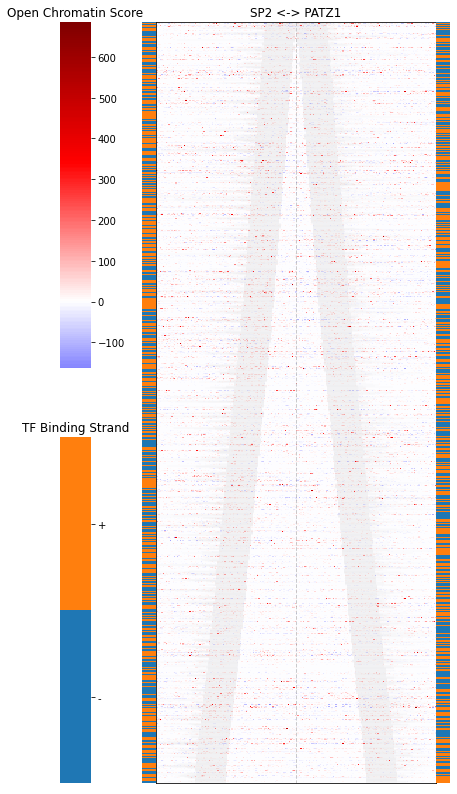

GridSpec(1, 2, width_ratios=[1, 10])

In [7]:
pairs.pairMap()

In [8]:
pairs.pairMap(logNorm_cbar="SymLogNorm")

FloatingPointError: underflow encountered in multiply

FloatingPointError: underflow encountered in multiply

<Figure size 504x1008 with 5 Axes>

Render animation:   0%|          | 0/102 [00:00<?, ?it/s]

AttributeError: can't set attribute

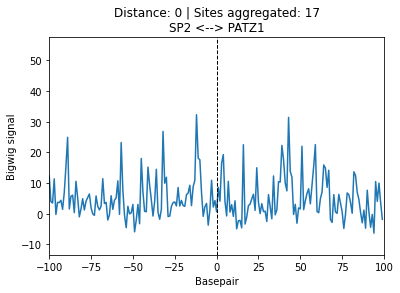

In [9]:
pairs.pairTrackAnimation()

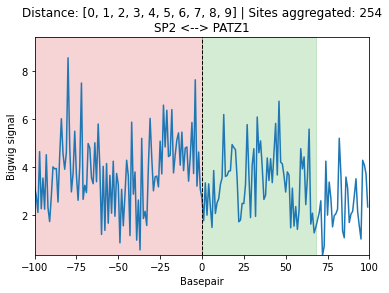

In [10]:
_ = pairs.pairTrack(dist=list(range(0,10)))